# Cardiac EDA

In [137]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
cardiac_data = pd.read_csv('E:\\NCI\\Statistics for Data Analytics\\CA_2\\Data files for TABA-20231218\\cardiac.csv')

In [138]:
# Display basic information about the dataset
df = cardiac_data.copy()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   caseno             100 non-null    int64  
 1   age                100 non-null    int64  
 2   weight             100 non-null    float64
 3   gender             100 non-null    object 
 4   fitness_score      100 non-null    float64
 5   cardiac_condition  100 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 4.8+ KB
None


In [139]:
# Summary statistics for numerical variables
print(df.describe())

           caseno        age      weight  fitness_score
count  100.000000  100.00000  100.000000     100.000000
mean    50.500000   41.10000   79.660300      43.629800
std     29.011492    9.14253   15.089842       8.571306
min      1.000000   30.00000   50.000000      27.350000
25%     25.750000   34.00000   69.732500      36.595000
50%     50.500000   39.00000   79.240000      42.730000
75%     75.250000   45.25000   89.912500      49.265000
max    100.000000   74.00000  115.420000      62.500000


In [140]:
# Get counts of 'cardiac_condition' values
cardiac_condition_counts = df['cardiac_condition'].value_counts()

# Display the counts
print(cardiac_condition_counts)


cardiac_condition
Absent     65
Present    35
Name: count, dtype: int64


In [141]:
# Get counts of 'Gender' where 'cardiac_condition' is 'Present'
gender_counts_present = df[df['cardiac_condition'] == 'Present']['gender'].value_counts()

# Display the counts
print(gender_counts_present)

gender
Male      27
Female     8
Name: count, dtype: int64


In [142]:
max_age = df['age'].max()
print(f"The maximum age in the dataset is: {max_age}")

The maximum age in the dataset is: 74


In [143]:
min_age = df['age'].min()
print(f"The minimum age in the dataset is: {min_age}")

The minimum age in the dataset is: 30


In [144]:
max_weight = df['weight'].max()
print(f"The maximum weight in the dataset is: {max_weight}")

The maximum weight in the dataset is: 115.42


In [145]:
min_weight = df['weight'].min()
print(f"The minimum weight in the dataset is: {min_weight}")

The minimum weight in the dataset is: 50.0


In [146]:
max_fittnes_score = df['fitness_score'].max()
print(f"The maximum fitness_score in the dataset is: {max_fittnes_score}")

The maximum fitness_score in the dataset is: 62.5


In [147]:
min_fittnes_score = df['fitness_score'].min()
print(f"The maximum fitness_score in the dataset is: {min_fittnes_score}")

The maximum fitness_score in the dataset is: 27.35


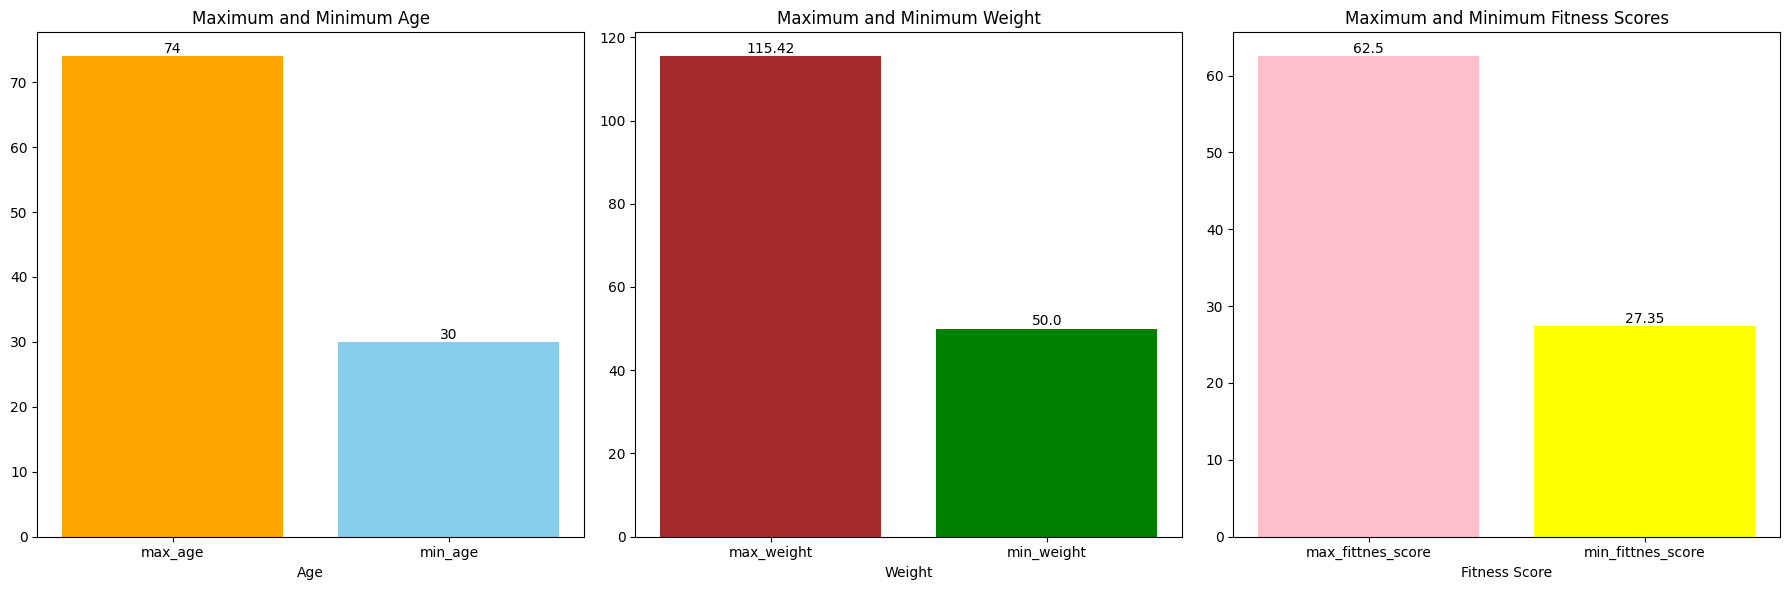

In [148]:
import matplotlib.pyplot as plt

# Example data
age_variables = ['max_age', 'min_age']
age_values = [max_age, min_age]

weight_variables = ['max_weight', 'min_weight']
weight_values = [max_weight, min_weight]

fitness_variables = ['max_fittnes_score', 'min_fittnes_score']
fitness_values = [max_fittnes_score, min_fittnes_score]

# Set the x-coordinates for the bars
x_coords = range(len(age_variables))

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot for Maximum and Minimum Ages
bars1 = axes[0].bar(x_coords, age_values, color=['orange', 'skyblue'])
axes[0].set_xticks(x_coords)
axes[0].set_xticklabels(age_variables)
axes[0].set_xlabel('Age')
axes[0].set_title('Maximum and Minimum Age')

# Add counts as annotations on top of the bars
for bar, value in zip(bars1, age_values):
    axes[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, str(value), ha='center', va='bottom')

# Plot for Maximum and Minimum Weight
bars2 = axes[1].bar(x_coords, weight_values, color=['brown', 'green'])
axes[1].set_xticks(x_coords)
axes[1].set_xticklabels(weight_variables)
axes[1].set_xlabel('Weight')
axes[1].set_title('Maximum and Minimum Weight')

# Add counts as annotations on top of the bars
for bar, value in zip(bars2, weight_values):
    axes[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, str(value), ha='center', va='bottom')

# Plot for Maximum and Minimum Fitness Scores
bars3 = axes[2].bar(x_coords, fitness_values, color=['Pink', 'yellow'])
axes[2].set_xticks(x_coords)
axes[2].set_xticklabels(fitness_variables)
axes[2].set_xlabel('Fitness Score')
axes[2].set_title('Maximum and Minimum Fitness Scores')

# Add counts as annotations on top of the bars
for bar, value in zip(bars3, fitness_values):
    axes[2].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, str(value), ha='center', va='bottom')

plt.tight_layout()
#plt.savefig('E:\\NCI\\Statistics for Data Analytics\\CA_2\\cardiac_images\\max_min_data.png')  # Change the file extension for different formats
plt.show()

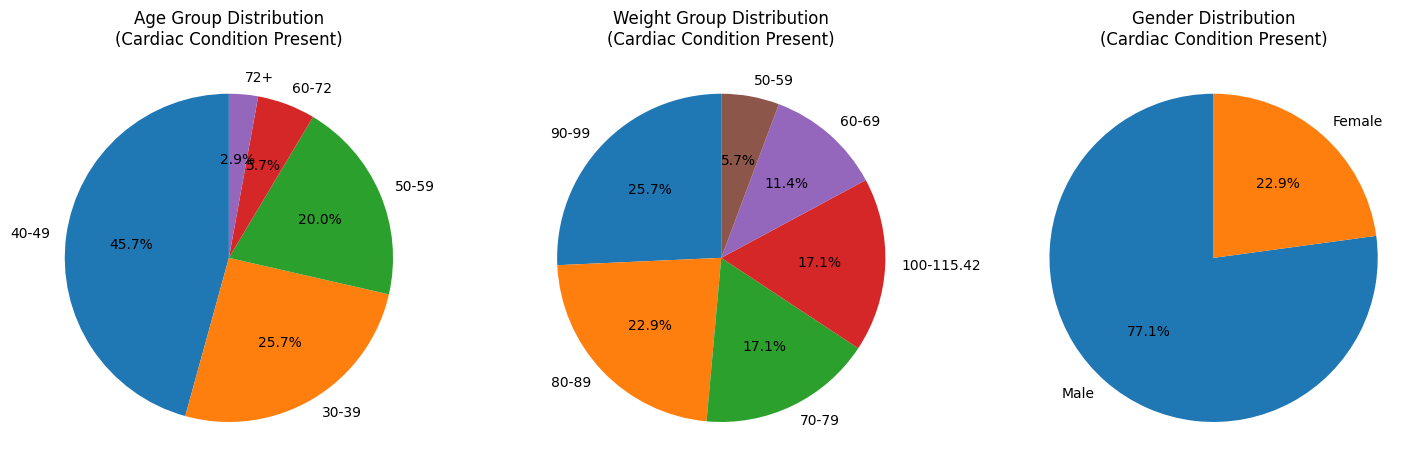

In [149]:
import matplotlib.pyplot as plt


# Create custom age groups
bins = [0, 39, 49, 59, 72, float('inf')]
labels = ['30-39', '40-49', '50-59', '60-72', '72+']
df['AgeGroup'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Count the occurrences of 'cardiac_condition' in each age group
age_group_counts = df[df['cardiac_condition'] == 'Present']['AgeGroup'].value_counts()

# Create custom weight groups
weight_bins = [50, 60, 70, 80, 90, 100, 115.42]
weight_labels = ['50-59', '60-69', '70-79', '80-89', '90-99', '100-115.42']
df['WeightGroup'] = pd.cut(df['weight'], bins=weight_bins, labels=weight_labels, right=False)

# Count the occurrences of 'cardiac_condition' in each weight group
weight_group_counts = df[df['cardiac_condition'] == 'Present']['WeightGroup'].value_counts()

# Get counts of 'Gender' where 'cardiac_condition' is 'Present'
gender_counts_present = df[df['cardiac_condition'] == 'Present']['gender'].value_counts()

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Pie chart for Age Group
axes[0].pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Age Group Distribution\n(Cardiac Condition Present)')

# Pie chart for Weight Group
axes[1].pie(weight_group_counts, labels=weight_group_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Weight Group Distribution\n(Cardiac Condition Present)')

# Pie chart for Gender
axes[2].pie(gender_counts_present, labels=gender_counts_present.index, autopct='%1.1f%%', startangle=90,)
axes[2].set_title('Gender Distribution\n(Cardiac Condition Present)')

#plt.savefig('E:\\NCI\\Statistics for Data Analytics\\CA_2\\cardiac_images\\distribution_data.png')  # Change the file extension for different formats

plt.show()

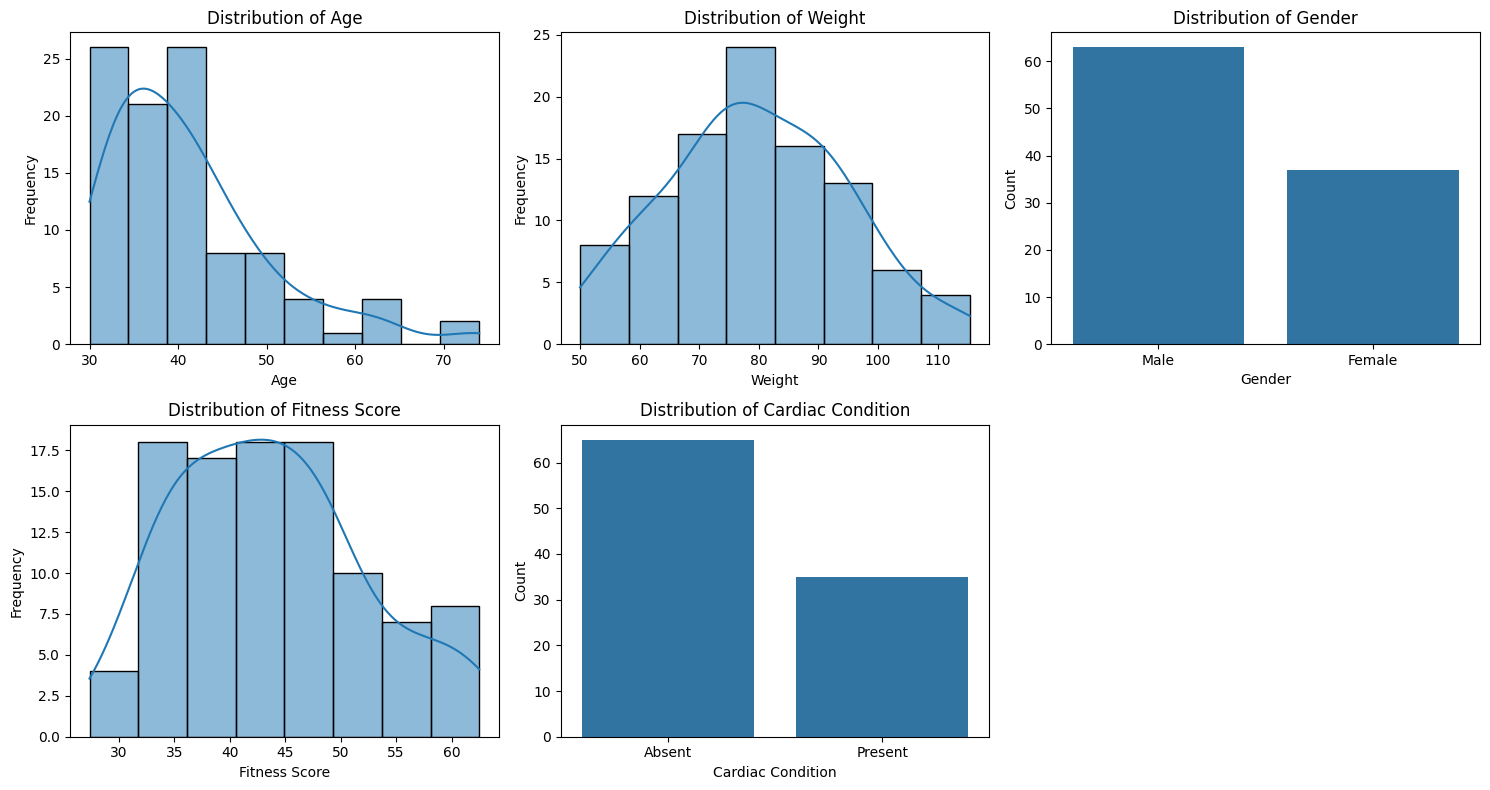

In [58]:
# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# EDA for Age
sns.histplot(df['age'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Age')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

# EDA for Weight
sns.histplot(df['weight'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Weight')
axes[0, 1].set_xlabel('Weight')
axes[0, 1].set_ylabel('Frequency')

# EDA for Gender
sns.countplot(x='gender', data=df, ax=axes[0, 2])
axes[0, 2].set_title('Distribution of Gender')
axes[0, 2].set_xlabel('Gender')
axes[0, 2].set_ylabel('Count')

# EDA for Fitness Score
sns.histplot(df['fitness_score'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Fitness Score')
axes[1, 0].set_xlabel('Fitness Score')
axes[1, 0].set_ylabel('Frequency')

# EDA for Cardiac Condition
sns.countplot(x='cardiac_condition', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Cardiac Condition')
axes[1, 1].set_xlabel('Cardiac Condition')
axes[1, 1].set_ylabel('Count')

# Remove the empty subplot in the last column
fig.delaxes(axes[1, 2])

# Adjust layout
plt.tight_layout()
plt.savefig('E:\\NCI\\Statistics for Data Analytics\\CA_2\\cardiac_images\\dist_data.png')  # Change the file extension for different formats

plt.show()

age                  0.344561
weight               0.283997
gender               0.214953
fitness_score       -0.203707
cardiac_condition    1.000000
Name: cardiac_condition, dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_20748\2632932996.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



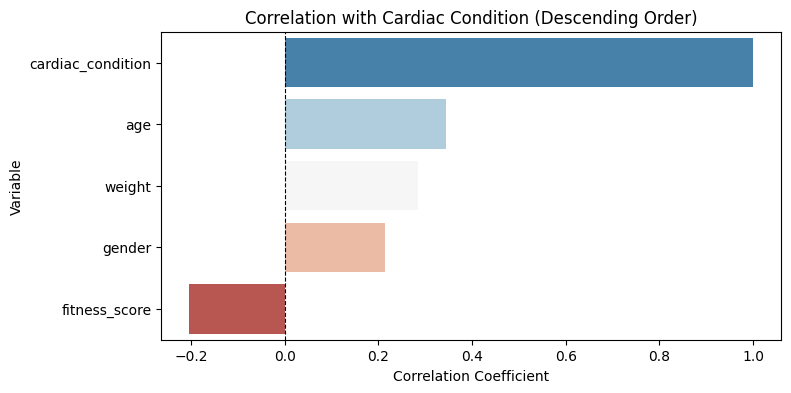

In [151]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df_encoded = cardiac_data.drop(['caseno'], axis =1).copy()

# Encode categorical variables (e.g., 'Gender' and 'cardiac_condition')
label_encoder = LabelEncoder()

# Encode 'Gender'
df_encoded['gender'] = label_encoder.fit_transform(df_encoded['gender'])

# Encode 'cardiac_condition'
df_encoded['cardiac_condition'] = label_encoder.fit_transform(df_encoded['cardiac_condition'])

# Calculate correlation matrix
correlation_matrix = df_encoded.corr()

# Extract correlation with 'cardiac_condition'
correlation_with_cardiac = correlation_matrix['cardiac_condition']

# Display the correlation values
print(correlation_with_cardiac)

# Sort the correlation values in descending order
correlation_with_cardiac_sorted = correlation_with_cardiac.sort_values(ascending=False)

# Create a diverging bar plot
plt.figure(figsize=(8,4))
# Add a vertical line at 0
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
sns.barplot(x=correlation_with_cardiac_sorted.values, y=correlation_with_cardiac_sorted.index, palette='RdBu_r')
plt.title('Correlation with Cardiac Condition (Descending Order)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Variable')
#plt.savefig('E:\\NCI\\Statistics for Data Analytics\\CA_2\\cardiac_images\\corr.png')  # Change the file extension for different formats
plt.show()

In [152]:
dfn= df_encoded.copy()

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the maximum and minimum values for each variable
max_values = dfn.max()
min_values = dfn.min()

# Create a DataFrame for visualization
summary_df = pd.DataFrame({'Variable': max_values.index, 'Max': max_values.values, 'Min': min_values.values})

# Melt the DataFrame for easier plotting
melted_df = summary_df.melt('Variable', var_name='Stat', value_name='Value')

melted_df

,Variable,Stat,Value
0,age,Max,74.00
1,weight,Max,115.42
2,gender,Max,1.00
3,fitness_score,Max,62.50
4,cardiac_condition,Max,1.00
5,age,Min,30.00
6,weight,Min,50.00
7,gender,Min,0.00
8,fitness_score,Min,27.35
9,cardiac_condition,Min,0.00


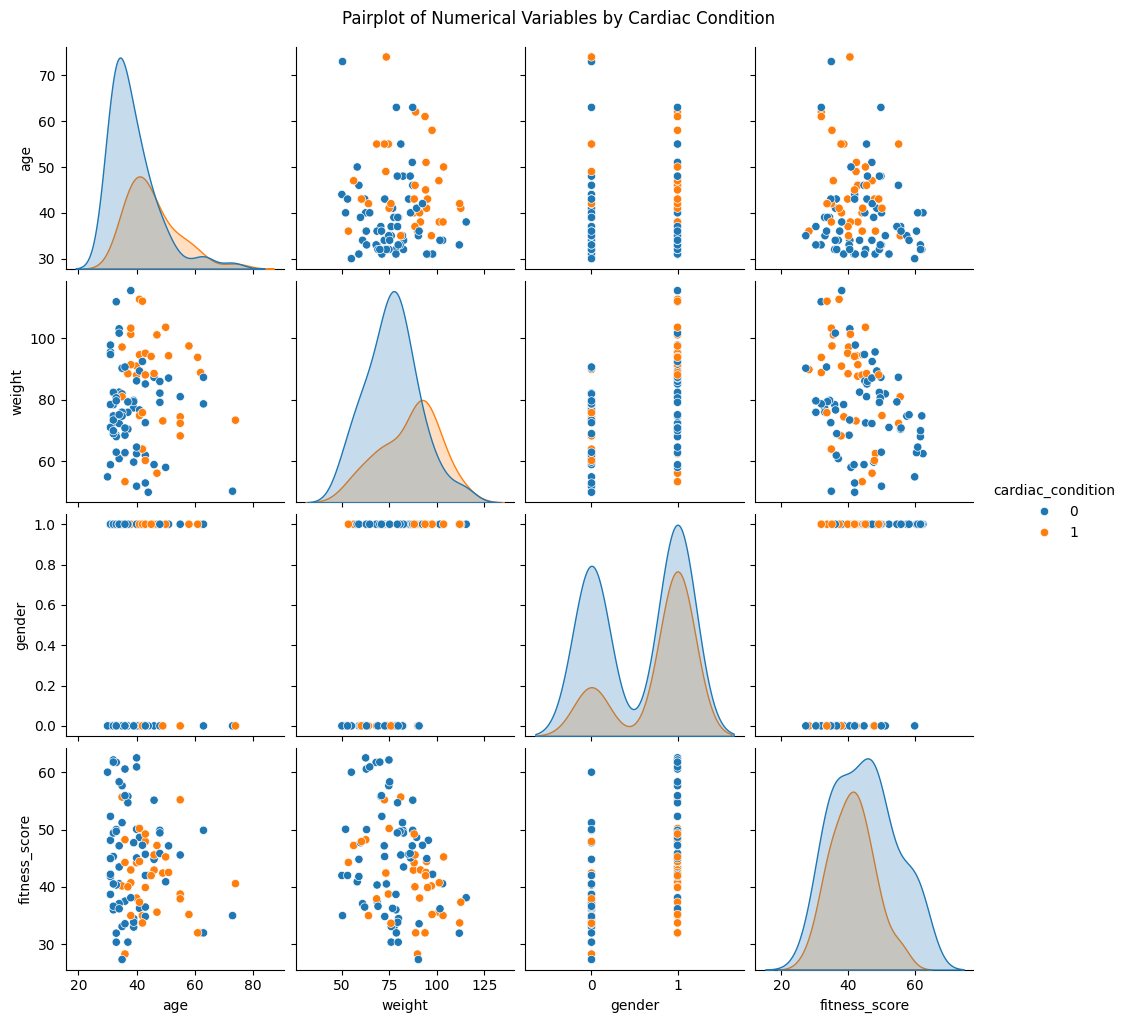

In [154]:
# Pairplot to visualize relationships between numerical variables

sns.pairplot(dfn, hue='cardiac_condition', diag_kind='kde')
plt.suptitle('Pairplot of Numerical Variables by Cardiac Condition', y=1.02)
#plt.savefig('E:\\NCI\\Statistics for Data Analytics\\CA_2\\cardiac_images\\pairplot.png')  # Change the file extension for different formats

plt.show()

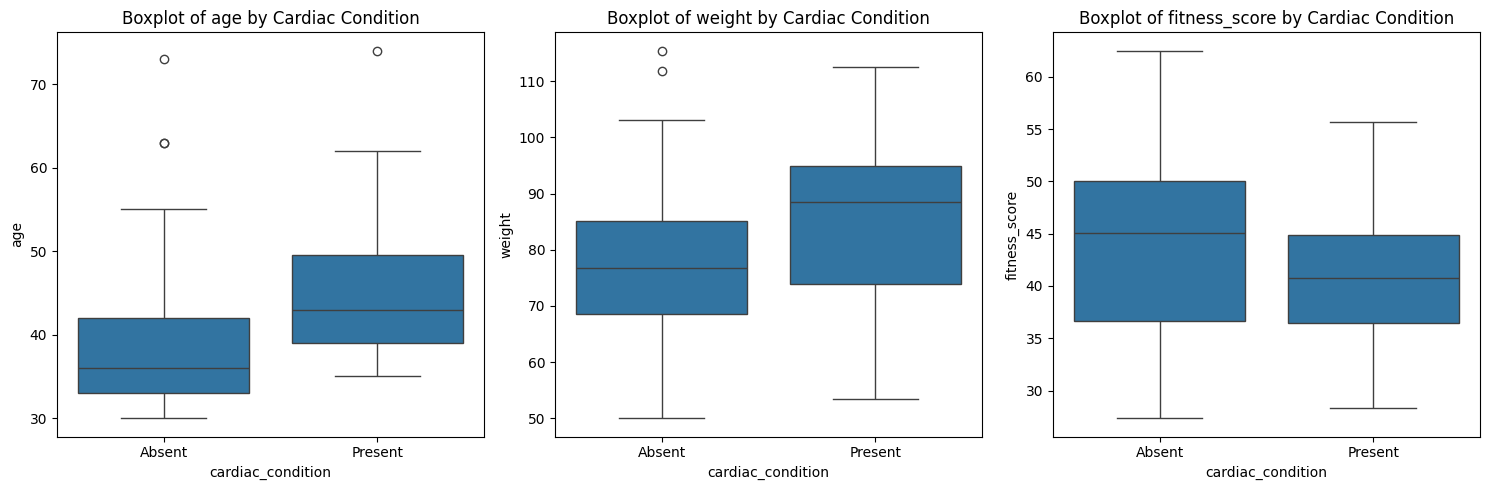

In [155]:
# Boxplot for numerical variables by Cardiac Condition
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
for i, col in enumerate(['age', 'weight', 'fitness_score']):
    sns.boxplot(x='cardiac_condition', y=col, data=cardiac_data, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col} by Cardiac Condition')
    
plt.tight_layout()
#plt.savefig('E:\\NCI\\Statistics for Data Analytics\\CA_2\\cardiac_images\\box.png')  # Change the file extension for different formats

plt.show()

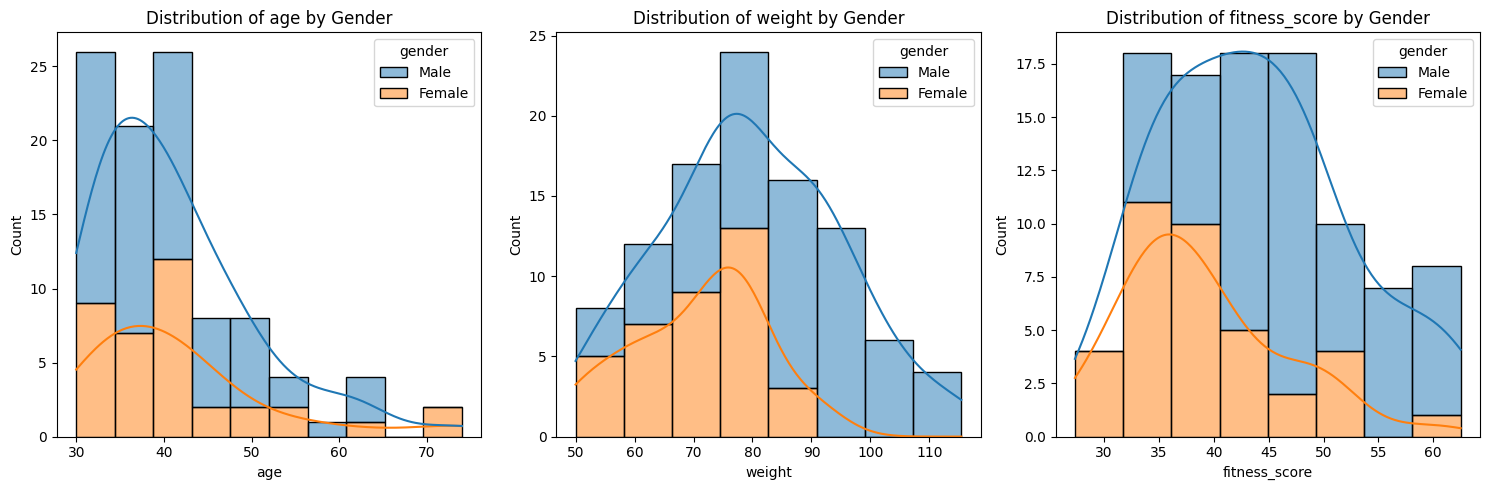

In [63]:
# Distribution of Age, Weight, and fitness_score by Gender
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
for i, col in enumerate(['age', 'weight', 'fitness_score']):
    sns.histplot(data=df, x=col, hue='gender', multiple='stack', kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col} by Gender')
plt.tight_layout()
plt.savefig('E:\\NCI\\Statistics for Data Analytics\\CA_2\\cardiac_images\\gender_distr.png')  # Change the file extension for different formats

plt.show()

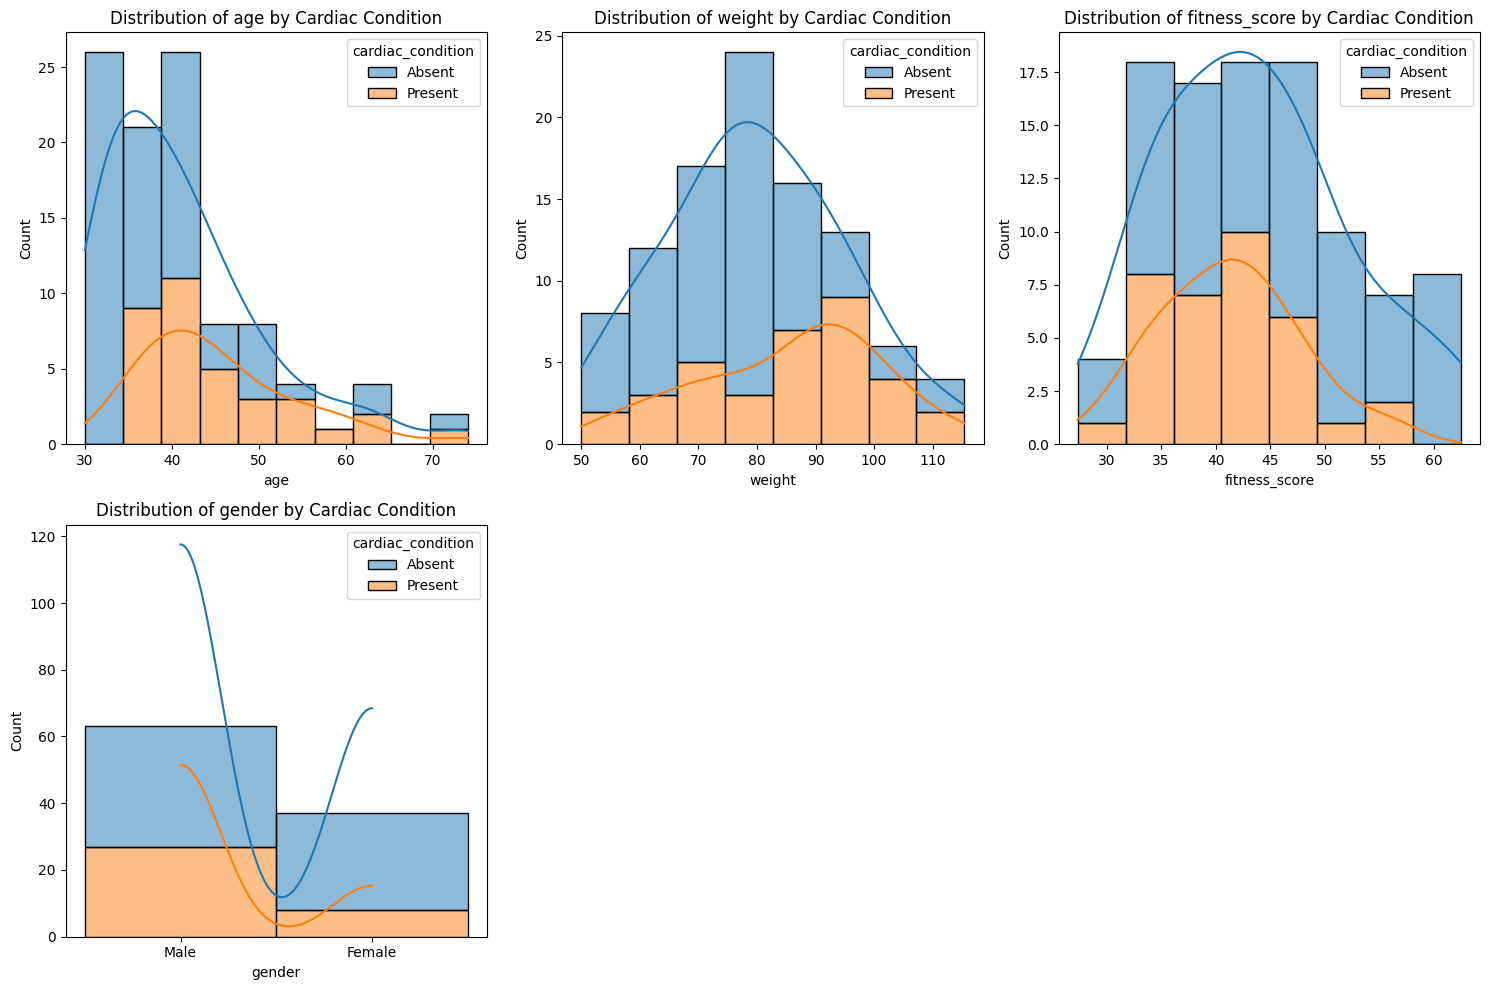

In [156]:
# Distribution of Age, Weight, and fitness_score by Gender and Cardiac Condition
variables_to_display = ['age', 'weight', 'fitness_score', 'gender']
num_variables = len(variables_to_display)

# Calculate the number of rows and columns for subplots
num_rows = (num_variables - 1) // 3 + 1
num_columns = min(num_variables, 3)

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(15, 5 * num_rows))

# Iterate through variables and create subplots
for i, col in enumerate(variables_to_display):
    sns.histplot(data=df, x=col, hue='cardiac_condition', multiple='stack', kde=True, ax=axes[i // num_columns, i % num_columns])
    axes[i // num_columns, i % num_columns].set_title(f'Distribution of {col} by Cardiac Condition')

# Remove any empty subplots
for i in range(num_variables, num_rows * num_columns):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

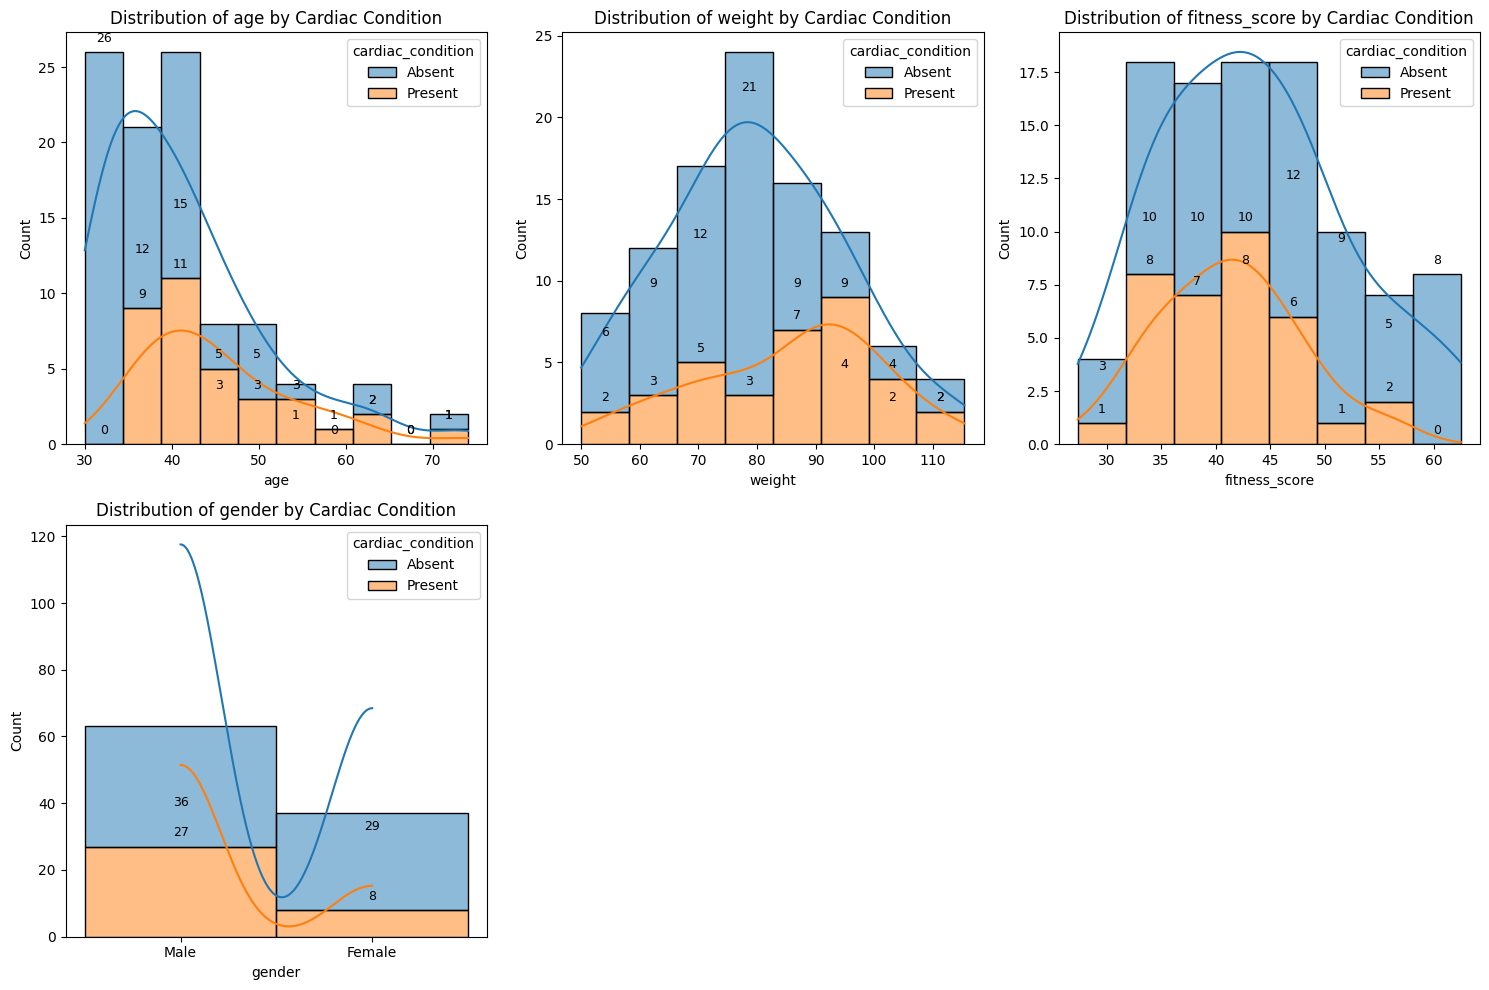

In [157]:
# Distribution of Age, Weight, and fitness_score by Gender and Cardiac Condition
variables_to_display = ['age', 'weight', 'fitness_score', 'gender']
num_variables = len(variables_to_display)

# Calculate the number of rows and columns for subplots
num_rows = (num_variables - 1) // 3 + 1
num_columns = min(num_variables, 3)

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(15, 5 * num_rows))

# Iterate through variables and create subplots
for i, col in enumerate(variables_to_display):
    ax = axes[i // num_columns, i % num_columns]
    sns.histplot(data=df, x=col, hue='cardiac_condition', multiple='stack', kde=True, ax=ax)
    ax.set_title(f'Distribution of {col} by Cardiac Condition')

    # Annotate bars with count values
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=9, color='black', xytext=(0, 10),
                    textcoords='offset points')

# Remove any empty subplots
for i in range(num_variables, num_rows * num_columns):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


In [158]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor


X=df_encoded

# Separate features (X) and target variable (y)
x = df_encoded.drop('cardiac_condition', axis=1)
y = df_encoded['cardiac_condition']

# Split the data into training and testing sets with seed value 22224122
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=22224122)

# Initialize and fit the logistic regression model
model = LogisticRegression()
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

# Access coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

print(f'Coefficients: {coefficients}')
print(f'Intercept: {intercept}')


Accuracy: 0.6800
Confusion Matrix:
[[12  5]
 [ 3  5]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.71      0.75        17
           1       0.50      0.62      0.56         8

    accuracy                           0.68        25
   macro avg       0.65      0.67      0.65        25
weighted avg       0.70      0.68      0.69        25

Coefficients: [[ 0.16070634 -0.00409535  1.31185807 -0.11286947]]
Intercept: [-2.71066459]


In [159]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

# Access coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

print(f'Coefficients: {coefficients}')
print(f'Intercept: {intercept}')

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Model 1
fpr_model1, tpr_model1, _ = roc_curve(y_test, y_pred)
roc_auc_model1 = roc_auc_score(y_test, y_pred)

Accuracy: 0.6800
Confusion Matrix:
[[12  5]
 [ 3  5]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.71      0.75        17
           1       0.50      0.62      0.56         8

    accuracy                           0.68        25
   macro avg       0.65      0.67      0.65        25
weighted avg       0.70      0.68      0.69        25

Coefficients: [[ 0.16070634 -0.00409535  1.31185807 -0.11286947]]
Intercept: [-2.71066459]


In [160]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df_scaled = df_encoded.copy()
numeric_columns = df_encoded.select_dtypes(include=['number']).columns

# Exclude 'gender' and 'cardiac_condition' columns
columns_to_scale = [col for col in numeric_columns if col not in ['gender', 'cardiac_condition']]

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to selected columns
df_scaled[columns_to_scale] = scaler.fit_transform(df_scaled[columns_to_scale])

df_scaled.describe()

,age,weight,gender,fitness_score,cardiac_condition
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.252273,0.453383,0.630000,0.463152,0.350000
std,0.207785,0.230661,0.485237,0.243849,0.479372
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.090909,0.301628,0.000000,0.263016,0.000000
50%,0.204545,0.446958,1.000000,0.437553,0.000000
75%,0.346591,0.610096,1.000000,0.623471,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [161]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor


X=df_scaled

# Separate features (X) and target variable (y)
x = df_scaled.drop('cardiac_condition', axis=1)
y = df_scaled['cardiac_condition']

# Split the data into training and testing sets with seed value 22224122
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=22224122)

# Initialize and fit the logistic regression model
model_sc = LogisticRegression()
model_sc.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model_sc.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

# Access coefficients and intercept
coefficients = model_sc.coef_
intercept = model_sc.intercept_

print(f'Coefficients: {coefficients}')
print(f'Intercept: {intercept}')


Accuracy: 0.6800
Confusion Matrix:
[[14  3]
 [ 5  3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.82      0.78        17
           1       0.50      0.38      0.43         8

    accuracy                           0.68        25
   macro avg       0.62      0.60      0.60        25
weighted avg       0.66      0.68      0.67        25

Coefficients: [[ 1.74230071  0.55812895  0.87371374 -1.27879408]]
Intercept: [-1.24837324]


In [162]:
# Model 2 (with Min-Max scaling)
model_sc = LogisticRegression()
model_sc.fit(x_train, y_train)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

# Access coefficients and intercept
coefficients = model_sc.coef_
intercept = model_sc.intercept_

print(f'Coefficients: {coefficients}')
print(f'Intercept: {intercept}')

fpr_model2, tpr_model2, _ = roc_curve(y_test, y_pred)
roc_auc_model2 = roc_auc_score(y_test, y_pred)

Accuracy: 0.6800
Confusion Matrix:
[[14  3]
 [ 5  3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.82      0.78        17
           1       0.50      0.38      0.43         8

    accuracy                           0.68        25
   macro avg       0.62      0.60      0.60        25
weighted avg       0.66      0.68      0.67        25

Coefficients: [[ 1.74230071  0.55812895  0.87371374 -1.27879408]]
Intercept: [-1.24837324]


In [163]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor


X=df_scaled.drop(['fitness_score'],axis=1)

# Separate features (X) and target variable (y)
x = df_scaled.drop(['cardiac_condition','fitness_score'], axis=1)
y = df_scaled['cardiac_condition']

# Split the data into training and testing sets with seed value 22224122
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=22224122)

# Initialize and fit the logistic regression model
model_sc1 = LogisticRegression()
model_sc1.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model_sc1.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

# Access coefficients and intercept
coefficients = model_sc1.coef_
intercept = model_sc1.intercept_

print(f'Coefficients: {coefficients}')
print(f'Intercept: {intercept}')

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


Accuracy: 0.6800
Confusion Matrix:
[[16  1]
 [ 7  1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.94      0.80        17
           1       0.50      0.12      0.20         8

    accuracy                           0.68        25
   macro avg       0.60      0.53      0.50        25
weighted avg       0.63      0.68      0.61        25

Coefficients: [[1.83100795 0.8805961  0.619362  ]]
Intercept: [-1.8601357]


In [164]:
# Assuming df_scaled is your DataFrame
cardiac_condition_counts = df_scaled['cardiac_condition'].value_counts()

# Display the counts
print(cardiac_condition_counts)

cardiac_condition
0    65
1    35
Name: count, dtype: int64


In [165]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

x = df_scaled.drop(['cardiac_condition'], axis=1)
y = df_scaled['cardiac_condition']

# Split the data into training and testing sets
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=22224122)

In [166]:
# Assuming df_scaled is your DataFrame
cardiac_condition_counts = y_train.value_counts()

# Display the counts
print(cardiac_condition_counts)

cardiac_condition
0    48
1    27
Name: count, dtype: int64


In [167]:
# Apply oversampling to the training set
oversample = SMOTE(random_state=22224122)
x_sampled,y_sampled = oversample.fit_resample(x_train,y_train)
#x_resampled, y_resampled = oversample.fit_resample(x_train, y_train)

In [168]:
print(y_sampled.value_counts())

cardiac_condition
0    48
1    48
Name: count, dtype: int64


In [169]:

# Train a model on the resampled data
model_os = LogisticRegression()
model_os.fit(x_sampled, y_sampled)

# Make predictions on the test set
y_pred = model_os.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

# Access coefficients and intercept
coefficients = model_os.coef_
intercept = model_os.intercept_

print(f'Coefficients: {coefficients}')
print(f'Intercept: {intercept}')

Accuracy: 0.7200
Confusion Matrix:
[[11  6]
 [ 1  7]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.65      0.76        17
           1       0.54      0.88      0.67         8

    accuracy                           0.72        25
   macro avg       0.73      0.76      0.71        25
weighted avg       0.80      0.72      0.73        25

Coefficients: [[ 2.34169417  0.60000345  0.93393207 -1.47107546]]
Intercept: [-0.85186053]


In [170]:
# Model 3 (with SMOTE oversampling)
model_os = LogisticRegression()
model_os.fit(x_sampled, y_sampled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

# Access coefficients and intercept
coefficients = model_os.coef_
intercept = model_os.intercept_

print(f'Coefficients: {coefficients}')
print(f'Intercept: {intercept}')

fpr_model3, tpr_model3, _ = roc_curve(y_test, y_pred)
roc_auc_model3 = roc_auc_score(y_test, y_pred)

Accuracy: 0.7200
Confusion Matrix:
[[11  6]
 [ 1  7]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.65      0.76        17
           1       0.54      0.88      0.67         8

    accuracy                           0.72        25
   macro avg       0.73      0.76      0.71        25
weighted avg       0.80      0.72      0.73        25

Coefficients: [[ 2.34169417  0.60000345  0.93393207 -1.47107546]]
Intercept: [-0.85186053]


In [171]:
x_sampled= x_sampled.drop('fitness_score',axis=1)
x_test = x_test.drop('fitness_score',axis=1)

# Train a model on the resampled data
model_osf = LogisticRegression()
model_osf.fit(x_sampled, y_sampled)

# Make predictions on the test set
y_pred = model_osf.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

# Access coefficients and intercept
coefficients = model_osf.coef_
intercept = model_osf.intercept_

print(f'Coefficients: {coefficients}')
print(f'Intercept: {intercept}')

Accuracy: 0.7200
Confusion Matrix:
[[11  6]
 [ 1  7]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.65      0.76        17
           1       0.54      0.88      0.67         8

    accuracy                           0.72        25
   macro avg       0.73      0.76      0.71        25
weighted avg       0.80      0.72      0.73        25

Coefficients: [[2.44756675 1.04489967 0.61405532]]
Intercept: [-1.56595243]


In [172]:
# Model 4 (without 'fitness_score' variable)
model_osf = LogisticRegression()
model_osf.fit(x_sampled, y_sampled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

# Access coefficients and intercept
coefficients = model_osf.coef_
intercept = model_osf.intercept_

print(f'Coefficients: {coefficients}')
print(f'Intercept: {intercept}')


Accuracy: 0.7200
Confusion Matrix:
[[11  6]
 [ 1  7]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.65      0.76        17
           1       0.54      0.88      0.67         8

    accuracy                           0.72        25
   macro avg       0.73      0.76      0.71        25
weighted avg       0.80      0.72      0.73        25

Coefficients: [[2.44756675 1.04489967 0.61405532]]
Intercept: [-1.56595243]


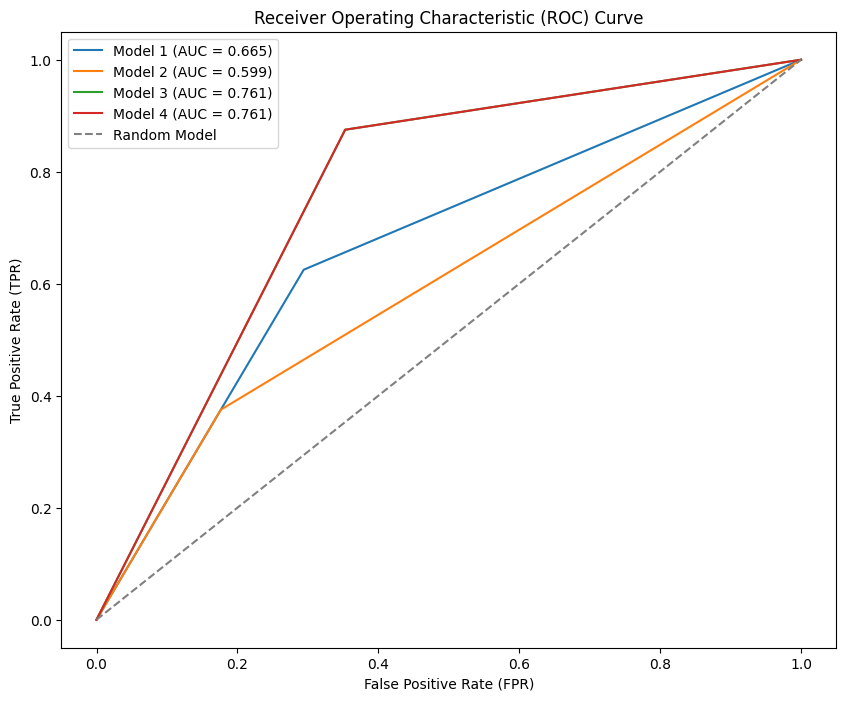

In [173]:

fpr_model4, tpr_model4, _ = roc_curve(y_test, y_pred)
roc_auc_model4 = roc_auc_score(y_test, y_pred)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_model1, tpr_model1, label=f'Model 1 (AUC = {roc_auc_model1:.3f})')
plt.plot(fpr_model2, tpr_model2, label=f'Model 2 (AUC = {roc_auc_model2:.3f})')
plt.plot(fpr_model3, tpr_model3, label=f'Model 3 (AUC = {roc_auc_model3:.3f})')
plt.plot(fpr_model4, tpr_model4, label=f'Model 4 (AUC = {roc_auc_model4:.3f})')

# Plot ROC curve for a random model (no skill)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Model')

# Set labels and title
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
#plt.savefig('E:\\NCI\\Statistics for Data Analytics\\CA_2\\cardiac_images\\ROC.png')  # Change the file extension for different formats
plt.show()


Explained Variance for Each Principal Component:
0    0.340140
1    0.277030
2    0.246802
3    0.136028
Name: Explained Variance, dtype: float64


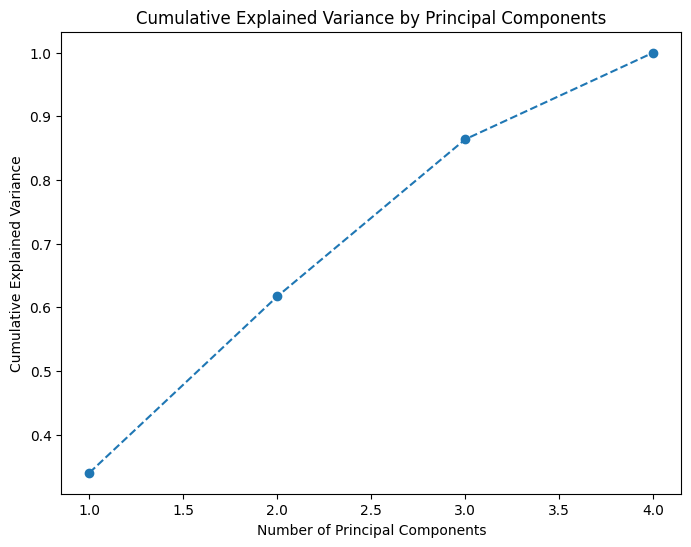

In [82]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Assuming cardiac_data is your DataFrame
numeric_columns = cardiac_data.select_dtypes(include=['float64', 'int64'])

# Standardize the numeric columns
scaler = StandardScaler()
numeric_columns_scaled = scaler.fit_transform(numeric_columns)

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(numeric_columns_scaled)

# Print the summary of PCA
pca_summary = pd.DataFrame(pca.components_, columns=numeric_columns.columns)

# Print the explained variance for each principal component
explained_variance = pca.explained_variance_ratio_
print("Explained Variance for Each Principal Component:")
print(pd.Series(explained_variance, name="Explained Variance"))

# Plot the explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.show()


In [83]:
print(pd.DataFrame(pca.components_, columns=numeric_columns.columns).iloc[0])

caseno           0.018400
age             -0.365931
weight          -0.598812
fitness_score    0.712165
Name: 0, dtype: float64


In [84]:
cardiac_data_filtered = cardiac_data[['age', 'fitness_score','cardiac_condition']]

In [85]:
X=df_scaled.drop(['fitness_score'],axis=1)

# Separate features (X) and target variable (y)
x = cardiac_data_filtered.drop(['cardiac_condition'], axis=1)
y = cardiac_data_filtered['cardiac_condition']

# Split the data into training and testing sets with seed value 22224122
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=22224122)

# Initialize and fit the logistic regression model
model_pca = LogisticRegression()
model_pca.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model_pca.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

# Access coefficients and intercept
coefficients = model_sc1.coef_
intercept = model_sc1.intercept_

print(f'Coefficients: {coefficients}')
print(f'Intercept: {intercept}')

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

Accuracy: 0.6000
Confusion Matrix:
[[10  7]
 [ 3  5]]
Classification Report:
              precision    recall  f1-score   support

      Absent       0.77      0.59      0.67        17
     Present       0.42      0.62      0.50         8

    accuracy                           0.60        25
   macro avg       0.59      0.61      0.58        25
weighted avg       0.66      0.60      0.61        25

Coefficients: [[1.83100795 0.8805961  0.619362  ]]
Intercept: [-1.8601357]


In [26]:
!pip install --upgrade scikit-learn

In [27]:
!pip install -U imbalanced-learn

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming df_encoded is your DataFrame
X = df_encoded.drop('cardiac_condition', axis=1)
y = df_encoded['cardiac_condition']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=22224122)

# Initialize Random Forest model
random_forest_model = RandomForestClassifier(random_state=22224122)

# Fit the model to the training data
random_forest_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred_rf = random_forest_model.predict(x_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

print(f'Random Forest Accuracy: {accuracy_rf:.4f}')
print(f'Random Forest Confusion Matrix:\n{conf_matrix_rf}')
print(f'Random Forest Classification Report:\n{classification_rep_rf}')

Random Forest Accuracy: 0.6800
Random Forest Confusion Matrix:
[[12  5]
 [ 3  5]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.71      0.75        17
           1       0.50      0.62      0.56         8

    accuracy                           0.68        25
   macro avg       0.65      0.67      0.65        25
weighted avg       0.70      0.68      0.69        25



In [60]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming df_encoded is your DataFrame
X = df_encoded.drop('cardiac_condition', axis=1)
y = df_encoded['cardiac_condition']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=22224122)

# Initialize Gradient Boosting model
gradient_boosting_model = GradientBoostingClassifier(random_state=22224122)

# Fit the model to the training data
gradient_boosting_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred_gb = gradient_boosting_model.predict(x_test)

# Evaluate the Gradient Boosting model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
classification_rep_gb = classification_report(y_test, y_pred_gb)

print(f'Gradient Boosting Accuracy: {accuracy_gb:.4f}')
print(f'Gradient Boosting Confusion Matrix:\n{conf_matrix_gb}')
print(f'Gradient Boosting Classification Report:\n{classification_rep_gb}')

Gradient Boosting Accuracy: 0.7600
Gradient Boosting Confusion Matrix:
[[12  5]
 [ 1  7]]
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.71      0.80        17
           1       0.58      0.88      0.70         8

    accuracy                           0.76        25
   macro avg       0.75      0.79      0.75        25
weighted avg       0.81      0.76      0.77        25

